In [1]:
# Uncomment, if RdKit is not installed already
#!pip install rdkit-pypi

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit.Chem.Descriptors as Descriptors

In [3]:


def smiles_to_descriptors(smiles, df):
    """
    Convert a list of SMILES strings to a dataframe of molecular descriptors.
    
    Args:
    - smiles (list): List of SMILES strings representing molecules.
    - df (pd.DataFrame): A pandas DataFrame to store the computed descriptors.
    
    Returns:
    - None: The function modifies the dataframe in place.
    """
    for index, smile in enumerate(smiles):
        rdkit_molecule_noH = Chem.MolFromSmiles(smile)
        rdkit_molecule = Chem.AddHs(rdkit_molecule_noH)
  
        # Extracting molecular properties using RdKit descriptor module
        molWeight = Descriptors.ExactMolWt(rdkit_molecule)
        hBondDs = Descriptors.NumHDonors(rdkit_molecule)
        hBondAs = Descriptors.NumHAcceptors(rdkit_molecule)
        solubility_logp = Descriptors.MolLogP(rdkit_molecule)
        rotatableBonds = Descriptors.NumRotatableBonds(rdkit_molecule)
  
        nAtoms = Chem.rdchem.Mol.GetNumAtoms(rdkit_molecule)
        fCharge = Chem.rdmolops.GetFormalCharge(rdkit_molecule)
        molar_refractivity = Chem.Crippen.MolMR(rdkit_molecule)
        nRings = Chem.rdMolDescriptors.CalcNumRings(rdkit_molecule)
  
        df.loc[index] = pd.Series({'Smiles':smile, 'nAtoms':nAtoms, 'Molecular Weight':molWeight,
                                   'HBondsDonors':hBondDs, 'HBondsAcceptors':hBondAs,
                                   'Rotatable Bonds':rotatableBonds, 'nRings':nRings,
                                   'LogP':solubility_logp, 'Formal Charge':fCharge, 'Polarizability':molar_refractivity})

if __name__ == '__main__':
    smiles = ['C1(=NC(=NC(=N1)Cl)Cl)Cl', 'C(C(CO[N+](=O)[O-])(CO[N+](=O)[O-])[N+](=O)[O-])O[N+](=O)[O-]',
              'C(C(CO[N+](=O)[O-])O[N+](=O)[O-])O[N+](=O)[O-]', 'FC(C(C(Cl)(Cl)Cl)(F)F)F',
              'C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F', 'CCF',
              'C(CO[N+](=O)[O-])O[N+](=O)[O-]', 'C([N+](=O)[O-])(Cl)(Cl)Cl', 'CC(C)CC#N',
              'FC(C(C(Cl)F)(F)F)F', 'ClCC#N']

    df = pd.DataFrame(data=None,
                      columns=['Smiles', 'nAtoms', 'Molecular Weight', 'HBondsDonors',
                               'HBondsAcceptors', 'Rotatable Bonds', 'nRings', 'LogP',
                               'Formal Charge', 'Polarizability'])
    smiles_to_descriptors(smiles, df)
    print(f'Descriptors DataFrame\n {df}')
    df.to_csv('smilesDescriptors.csv', sep=',')


In [4]:
data_frame = pd.read_csv('smilesDescriptors.csv')
data_frame

,Unnamed: 0,Smiles,nAtoms,Molecular Weight,HBondsDonors,HBondsAcceptors,Rotatable Bonds,nRings,LogP,Formal Charge,Polarizability
0,0,C1(=NC(=NC(=N1)Cl)Cl)Cl,9,182.915780,0,3,0,1,1.83180,0,34.8570
1,1,C(C(CO[N+](=O)[O-])(CO[N+](=O)[O-])[N+](=O)[O-...,25,286.003307,0,11,10,0,-1.37320,0,48.5646
2,2,C(C(CO[N+](=O)[O-])O[N+](=O)[O-])O[N+](=O)[O-],20,227.002579,0,9,8,0,-1.02010,0,37.7602
3,3,FC(C(C(Cl)(Cl)Cl)(F)F)F,11,217.907996,0,0,1,0,3.25700,0,31.2410
4,4,C(CS(=O)(=O)O)C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)...,30,427.975182,1,3,8,0,4.00310,0,51.8226
5,5,CCF,8,48.037528,0,0,1,0,0.97580,0,11.6490
6,6,C(CO[N+](=O)[O-])O[N+](=O)[O-],14,152.006936,0,6,5,0,-0.59700,0,25.8928
7,7,C([N+](=O)[O-])(Cl)(Cl)Cl,7,162.899461,0,2,0,0,1.59080,0,27.2844
8,8,CC(C)CC#N,15,83.073499,0,1,3,0,1.55608,0,25.0680
9,9,FC(C(C(Cl)F)(F)F)F,11,167.976519,0,0,2,0,2.42120,0,21.7000


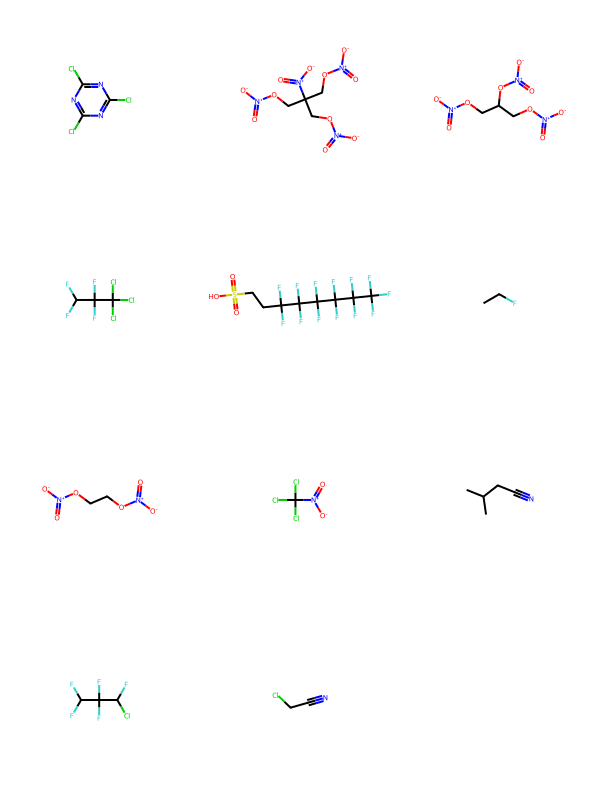

In [5]:
ms = [Chem.MolFromSmiles(smile) for smile in smiles]
Draw.MolsToGridImage(ms)